 # 1. Import the necessary libraries

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from IPython.display import Image
from os import sys

 # 2. Read the data as a data frame

In [85]:
bank_df = pd.read_csv('C:/Users/Surya-Rekha/Downloads/bank-full.csv')
bank_df.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


 # 3. Basic EDA

# a. Shape of data frame

In [86]:
print("Shape of the bank data frame is {}.".format(bank_df.shape))

Shape of the bank data frame is (45211, 17).


# b. Datatype of each attribute

In [87]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# c. Checking the presence of missing values

In [88]:
print('Count of nulls for each column: \n',bank_df.isnull().sum())

Count of nulls for each column: 
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


# d. 5 point summary of numerical attributes

In [89]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# e. Checking the presence of outliers

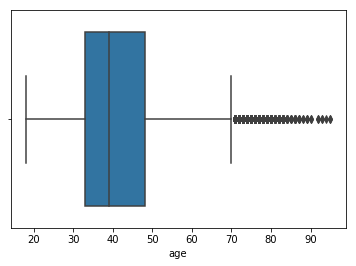

In [90]:
## Age column has maximum outliers above 70. 
sns.boxplot(bank_df["age"])

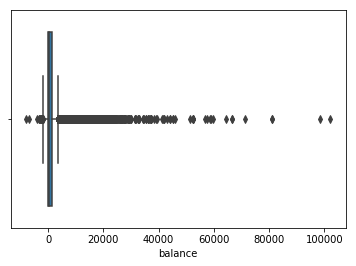

In [91]:
## Balance column have outliers below 0 and above 5000
sns.boxplot(bank_df["balance"])

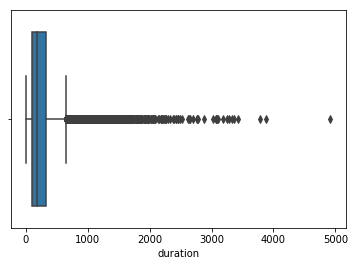

In [92]:
## Duration column have outliers above 700
sns.boxplot(bank_df["duration"])

#  4. Prepare the data to train a model – check if data types are  appropriate, get rid of the missing values etc..

In [93]:
for feature in bank_df.columns:
    if bank_df[feature].dtype=='object':
        bank_df[feature]=pd.Categorical(bank_df[feature])
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [94]:
## Replacing unknown column values with -1
bank_df = bank_df.replace("unknown",-1)
replaceStruct = {
                "marital": {"single":1,"married":2,"divorced":3},
                "education": {"primary":1,"secondary":2,"tertiary":3},
                "default": {"no":0,"yes":1},
                "housing": {"no":0,"yes":1},
                "loan": {"no":0,"yes":1},
                "contact": {"cellular":1,"telephone":2},
                "poutcome": {"success":1,"failure":2,"other":3},
                "Target": {"no":0,"yes":1}
                }

In [95]:
bank_df = bank_df.replace(replaceStruct)
oneHotcols= ["job", "month"]
bank_df = pd.get_dummies(bank_df,columns=oneHotcols)
bank_df.head(5)

,age,marital,education,default,balance,housing,loan,contact,day,duration,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2,3,0,2143,1,0,-1,5,261,...,0,0,0,0,0,0,1,0,0,0
1,44,1,2,0,29,1,0,-1,5,151,...,0,0,0,0,0,0,1,0,0,0
2,33,2,2,0,2,1,1,-1,5,76,...,0,0,0,0,0,0,1,0,0,0
3,47,2,-1,0,1506,1,0,-1,5,92,...,0,0,0,0,0,0,1,0,0,0
4,33,1,-1,0,1,0,0,-1,5,198,...,0,0,0,0,0,0,1,0,0,0


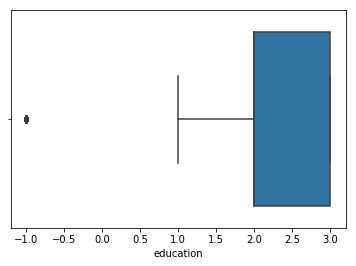

In [96]:
## Education column has only outlier
sns.boxplot(bank_df["education"])

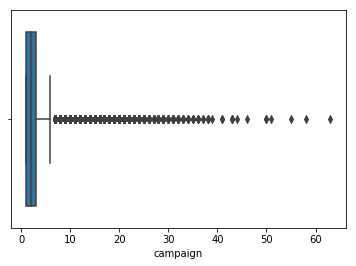

In [97]:
## Campaign column have outliers from after 7
sns.boxplot(bank_df["campaign"])

In [98]:
# Using z-score we can also detect outliers
z = np.abs(stats.zscore(bank_df))
print(z)

[[1.60696496 0.27576178 1.08614757 ... 0.31026348 0.12881901 0.113898  ]
 [0.28852927 1.3683719  0.02153577 ... 0.31026348 0.12881901 0.113898  ]
 [0.74738448 0.27576178 0.02153577 ... 0.31026348 0.12881901 0.113898  ]
 ...
 [2.92540065 0.27576178 0.02153577 ... 3.22306705 0.12881901 0.113898  ]
 [1.51279098 0.27576178 0.02153577 ... 3.22306705 0.12881901 0.113898  ]
 [0.37068857 0.27576178 0.02153577 ... 3.22306705 0.12881901 0.113898  ]]


In [99]:
# Setting threshold value to 3 to eliminate the outliers
threshold = 3
print(np.where(z>3))

(array([    2,     3,     4, ..., 45210, 45210, 45210], dtype=int64), array([18,  2,  2, ..., 12, 18, 36], dtype=int64))


In [100]:
# The first array contains the list of row numbers and second array respective column numbers, 
# which mean z[2][18] have a Z-score higher than 3.

print(z[2][18])

5.422561153987016


In [101]:
# Forming dataset without outliers
bank_df_nonout = bank_df[(z < 3).all(axis=1)]

In [102]:
print('Size of dataframe before outliers',bank_df.shape)
print('Size of dataframe before outliers',bank_df_nonout.shape) ##25678 rows are removed which are outliers.

Size of dataframe before outliers (45211, 39)
Size of dataframe before outliers (19533, 39)


In [103]:
## Distribution of Target
bank_df_nonout["Target"].value_counts(normalize=True)

0    0.930681
1    0.069319
Name: Target, dtype: float64

# Split into training and test datasets

In [104]:
X = bank_df_nonout.drop("Target", axis=1) ## Independent variables
y = bank_df_nonout.pop("Target") ## Dependent variable/predictor

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7) ## Splitting of train,test datasets.

# 5. Train a few standard classification algorithms, note and  comment on their performances along different metrics.

# Logistic Regression Model

In [106]:
from sklearn.linear_model import LogisticRegression
# Define Logistic regression model
logregmodel = LogisticRegression()
print(logregmodel)
print('\n')
#Fitting model
logregmodel.fit(X_train, y_train)
#Predicting y values
y_pred_log=logregmodel.predict(X_test)

t=list(X_train.columns)
coef_df = pd.DataFrame(logregmodel.coef_, columns=t)
coef_df['Intercept'] = logregmodel.intercept_
print(coef_df)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


        age   marital  education  default   balance   housing      loan  \
0 -0.007891 -0.108202   0.260007      0.0  0.000038 -0.686969 -0.472864   

    contact       day  duration  ...  month_feb  month_jan  month_jul  \
0  0.872192 -0.002568   0.00707  ...        0.0        0.0  -1.461887   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  Intercept  
0   0.337181        0.0   -0.85459        0.0        0.0        0.0  -3.056255  

[1 rows x 39 columns]

C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [107]:
# Checking scores on training,test sets
print(logregmodel.score(X_train, y_train))
print(logregmodel.score(X_test, y_test))

0.9384919183792877
0.933617747440273


# KNN Model

In [108]:
from sklearn.neighbors import KNeighborsClassifier
# Define KNN model
knnmodel = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Fit the model
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [109]:
# Checking scores on training,test sets
print(knnmodel.score(X_train, y_train))
print(knnmodel.score(X_test, y_test))

# Predict y values
y_pred_near = knnmodel.predict(X_test)

1.0
0.9249146757679181


# Naive-Bayes Model

In [110]:
from sklearn.naive_bayes import GaussianNB
gnbmodel = GaussianNB()
# Fit the model
gnbmodel.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [111]:
# Checking scores on training,test sets
print(gnbmodel.score(X_train, y_train))
print(gnbmodel.score(X_test, y_test))

# Predict y values
y_pred_naive = knnmodel.predict(X_test)

0.9044101513932568
0.8964163822525597


# SVM Model

In [112]:
from sklearn.svm import SVC
svmmodel = SVC(C=0.01,kernel='rbf',degree=3, random_state=10)
svmmodel.fit(X_train,y_train)

C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=10,
  shrinking=True, tol=0.001, verbose=False)

In [113]:
y_pred_svcl = svmmodel.predict(X_test)
# Checking scores on training,test sets
print(svmmodel.score(X_train, y_train))
print(svmmodel.score(X_test, y_test))

0.9317633291889125
0.9281569965870308


# 6. Build the ensemble models and compare the results with  the base models. Note: Random forest can be used only  with Decision trees.

# Decision Tree Model

In [114]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=10)
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [115]:
y_pred_tree = dtmodel.predict(X_test)
# Checking scores on training,test sets
print(dtmodel.score(X_train, y_train))
print(dtmodel.score(X_test, y_test))

0.9437577707891465
0.9361774744027304


# Bagging Model

In [116]:
from sklearn.ensemble import BaggingClassifier
bgclmodel = BaggingClassifier(base_estimator=dtmodel, n_estimators=100, bootstrap=True)
bgclmodel.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [117]:
y_pred_bgcl = bgclmodel.predict(X_test)
# Checking scores on training,test sets
print(bgclmodel.score(X_train, y_train))
print(bgclmodel.score(X_test, y_test))

0.946756381189205
0.9370307167235495


# Random Forest Model

In [118]:
from sklearn.ensemble import RandomForestClassifier
rfcl_model = RandomForestClassifier(n_estimators=100,max_depth=5,criterion='gini',bootstrap=True,random_state=10)
rfcl_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [119]:
y_pred_rfcl = bgclmodel.predict(X_test)
# Checking scores on training,test sets
print(rfcl_model.score(X_train, y_train))
print(rfcl_model.score(X_test, y_test))

0.9342499817157902
0.9302047781569965


#  Ada-Boosting Model

In [120]:
from sklearn.ensemble import AdaBoostClassifier
adboostcl_model = AdaBoostClassifier(base_estimator=dtmodel, n_estimators=50, learning_rate=0.01, random_state=10)
adboostcl_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'),
          learning_rate=0.01, n_estimators=50, random_state=10)

In [121]:
y_pred_adboost = adboostcl_model.predict(X_test)
# Checking scores on training,test sets
print(adboostcl_model.score(X_train, y_train))
print(adboostcl_model.score(X_test, y_test))

0.94719520222336
0.9361774744027304


# Gradient Boosting Model

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
gboostcl_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=100,criterion='mse')
gboostcl_model.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.01,
              loss='deviance', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [123]:
y_pred_gboost = gboostcl_model.predict(X_test)

In [124]:
# Checking scores on training,test sets
print(gboostcl_model.score(X_train, y_train))
print(gboostcl_model.score(X_test, y_test))

0.9324946975791706
0.9281569965870308


# Models Accuracy

In [51]:
print('1. Accuracy score for Logistic Regression model: \n', metrics.accuracy_score(y_test, y_pred_log)*100)
print('\n')
print('2. Accuracy score for KNN model: \n', metrics.accuracy_score(y_test, y_pred_near)*100)
print('\n')
print('3. Accuracy score for Naive Bayes model: \n', metrics.accuracy_score(y_test, y_pred_naive)*100)
print('\n')
print('4. Accuracy score for SVM model: \n', metrics.accuracy_score(y_test, y_pred_svcl)*100)
print('\n')
print('5. Accuracy score for Decision tree model: \n', metrics.accuracy_score(y_test, y_pred_tree)*100)
print('\n')
print('6. Accuracy score for Bagging model: \n', metrics.accuracy_score(y_test, y_pred_bgcl)*100)
print('\n')
print('7. Accuracy score for Random Forest model: \n', metrics.accuracy_score(y_test, y_pred_rfcl)*100)
print('\n')
print('8. Accuracy score for Ada Boosting model: \n', metrics.accuracy_score(y_test, y_pred_adboost)*100)
print('\n')
print('9. Accuracy score for Gradient Boosting model: \n', metrics.accuracy_score(y_test, y_pred_gboost)*100)

1. Accuracy score for Logistic Regression model: 
 93.3617747440273


2. Accuracy score for KNN model: 
 92.4914675767918


3. Accuracy score for Naive Bayes model: 
 92.4914675767918


4. Accuracy score for SVM model: 
 92.81569965870308


5. Accuracy score for Decision tree model: 
 93.61774744027304


6. Accuracy score for Bagging model: 
 93.61774744027304


7. Accuracy score for Random Forest model: 
 93.61774744027304


8. Accuracy score for Ada Boosting model: 
 93.61774744027304


9. Accuracy score for Gradient Boosting model: 
 92.81569965870308


# Confusion Matrix

In [52]:
print('1. Confusion matrix for Logistic Regression model: \n', metrics.confusion_matrix(y_test, y_pred_log))
print('\n')
print('2. Confusion matrix for KNN model: \n', metrics.confusion_matrix(y_test, y_pred_near))
print('\n')
print('3. Confusion matrix for Naive Bayes model: \n', metrics.confusion_matrix(y_test, y_pred_naive))
print('\n')
print('4. Confusion matrix for Decision Tree model: \n', metrics.confusion_matrix(y_test, y_pred_tree))
print('\n')
print('5. Confusion matrix for Bagging model: \n', metrics.confusion_matrix(y_test, y_pred_bgcl))
print('\n')
print('6. Confusion matrix for Random Forest model: \n', metrics.confusion_matrix(y_test, y_pred_rfcl))
print('\n')
print('7. Confusion matrix for Ada-Boost model: \n', metrics.confusion_matrix(y_test, y_pred_adboost))
print('\n')
print('8. Confusion matrix for Gradient Boost model: \n', metrics.confusion_matrix(y_test, y_pred_gboost))

1. Confusion matrix for Logistic Regression model: 
 [[5348   91]
 [ 298  123]]


2. Confusion matrix for KNN model: 
 [[5329  110]
 [ 330   91]]


3. Confusion matrix for Naive Bayes model: 
 [[5329  110]
 [ 330   91]]


4. Confusion matrix for Decision Tree model: 
 [[5375   64]
 [ 310  111]]


5. Confusion matrix for Bagging model: 
 [[5366   73]
 [ 301  120]]


6. Confusion matrix for Random Forest model: 
 [[5366   73]
 [ 301  120]]


7. Confusion matrix for Ada-Boost model: 
 [[5340   99]
 [ 275  146]]


8. Confusion matrix for Gradient Boost model: 
 [[5438    1]
 [ 420    1]]


# Classification report

In [62]:
print('1. Classification report for Logistic Regression model: \n', metrics.classification_report(y_test, y_pred_log))
print('\n')
print('2. Classification report for KNN model: \n', metrics.classification_report(y_test, y_pred_near))
print('\n')
print('3. Classification report for Naive Bayes model: \n', metrics.classification_report(y_test, y_pred_naive))
print('\n')
print('4. Classification report for SVM model: \n', metrics.classification_report(y_test, y_pred_svcl))
print('\n')
print('5. Classification report for Decision Tree model: \n', metrics.classification_report(y_test, y_pred_tree))
print('\n')
print('6. Classification report for Bagging model: \n', metrics.classification_report(y_test, y_pred_bgcl))
print('\n')
print('7. Classification report for Random Forest model: \n', metrics.classification_report(y_test, y_pred_rfcl))
print('\n')
print('8. Classification report for Ada-Boost model: \n', metrics.classification_report(y_test, y_pred_adboost))
print('\n')
print('9. Classification report for Gradient Boost model: \n', metrics.classification_report(y_test, y_pred_gboost))

1. Classification report for Logistic Regression model: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      5439
           1       0.57      0.29      0.39       421

   micro avg       0.93      0.93      0.93      5860
   macro avg       0.76      0.64      0.68      5860
weighted avg       0.92      0.93      0.92      5860



2. Classification report for KNN model: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      5439
           1       0.45      0.22      0.29       421

   micro avg       0.92      0.92      0.92      5860
   macro avg       0.70      0.60      0.63      5860
weighted avg       0.91      0.92      0.91      5860



3. Classification report for Naive Bayes model: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      5439
           1       0.45      0.22      0.29       421

   micro avg       0.92     

C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Insight: Ensemble models performs better in terms of precision, recall and f1-score than base models.

# 7. Compare performances of all the model

# Algorithm comparision based on Accuracy, Recall

In [125]:
# Prepare all models
models = []
models.append(('Logistic_Regression', LogisticRegression()))
models.append(('K-Nearest Neighbor', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Ada Boost', AdaBoostClassifier()))
models.append(('Gradient Boost', GradientBoostingClassifier()))
print(models)

[('Logistic_Regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('K-Nearest Neighbor', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')), ('Naive Bayes', GaussianNB(priors=None, var_smoothing=1e-09)), ('Support Vector Machine', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)), ('Decision Tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_

In [126]:
# Evaluate each model in turn with 'accuracy'
results = []
names = []
scoring = 'accuracy'

In [127]:
for name, model in models:
        kfold = KFold(n_splits=10, random_state=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        #print(results)
        msg = "%s: %f, (%f)" % (name, cv_results.mean(), cv_results.std())
        print('\n {}'.format(msg))

C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


 Logistic_Regression: 0.937688, (0.004447)

 K-Nearest Neighbor: 0.930155, (0.005372)

 Naive Bayes: 0.904411, (0.008241)


C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\svm\


 Support Vector Machine: 0.931764, (0.006722)

 Decision Tree: 0.912090, (0.005280)

 Bagging: 0.934616, (0.004632)


C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\skl


 Random Forest: 0.935201, (0.005829)

 Ada Boost: 0.934543, (0.003478)

 Gradient Boost: 0.940175, (0.005624)


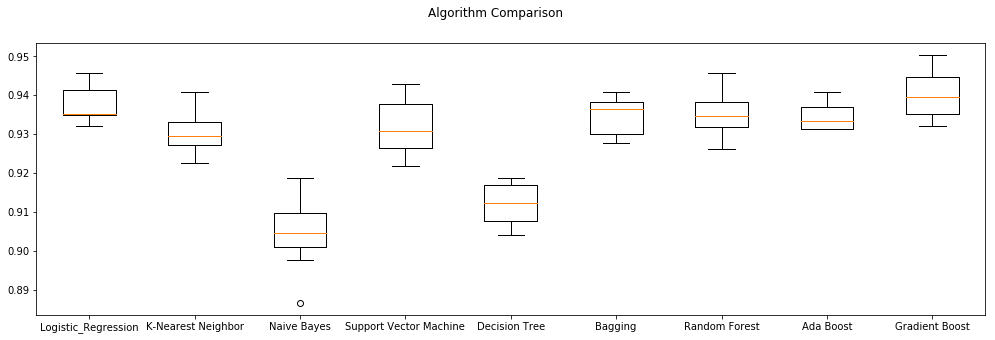

In [128]:
# Algorithm comparison based on accuracy
fig = plt.figure(figsize=(17,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Insight: Gradient Boost, Logistic regression and Random Forest are performing well in terms of accuracy.

In [129]:
# Evaluate each model in term with 'recall'
results = []
names = []
scoring2 = 'recall'

In [130]:
for name, model in models:
        kfold = KFold(n_splits=8, random_state=10)
        cross_val_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring2)
        results.append(cross_val_results)
        names.append(name)
        #print(results)
        msg = "%s: %f, (%f)" % (name, cross_val_results.mean(), cross_val_results.std())
        print('\n {}'.format(msg))

C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


 Logistic_Regression: 0.287105, (0.016114)

 K-Nearest Neighbor: 0.211275, (0.040017)

 Naive Bayes: 0.432519, (0.052510)


C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\svm\


 Support Vector Machine: 0.000000, (0.000000)

 Decision Tree: 0.403476, (0.042975)

 Bagging: 0.323184, (0.032810)


C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\skl


 Random Forest: 0.241511, (0.036157)

 Ada Boost: 0.311168, (0.035050)

 Gradient Boost: 0.333556, (0.025566)


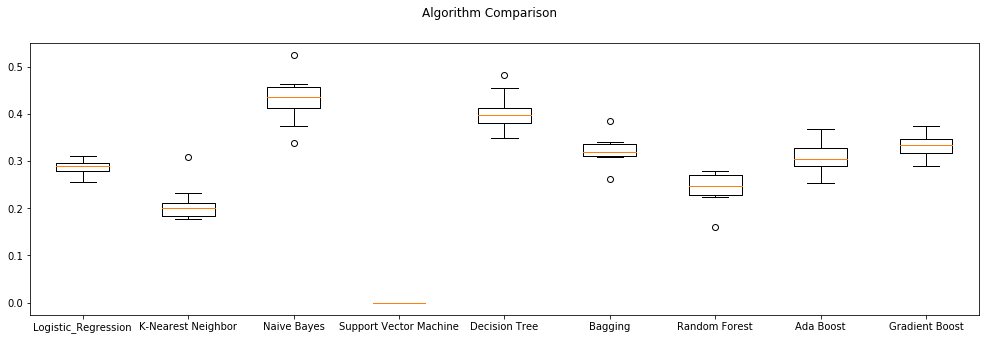

In [131]:
# Algorithm comparison based on recall
fig = plt.figure(figsize=(17,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Insight: Naive Bayes, Decision Tree and Gradient Boost are performing well in terms of recall